In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [143]:
# read dataset
data = pd.read_csv("./nasa.csv")
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [144]:
data.shape

(4687, 40)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [146]:
# check missing value
(data.isnull().sum()*100/len(data)).sort_values(ascending=False)

Neo Reference ID                0.0
Name                            0.0
Orbit Determination Date        0.0
Orbit Uncertainity              0.0
Minimum Orbit Intersection      0.0
Jupiter Tisserand Invariant     0.0
Epoch Osculation                0.0
Eccentricity                    0.0
Semi Major Axis                 0.0
Inclination                     0.0
Asc Node Longitude              0.0
Orbital Period                  0.0
Perihelion Distance             0.0
Perihelion Arg                  0.0
Aphelion Dist                   0.0
Perihelion Time                 0.0
Mean Anomaly                    0.0
Mean Motion                     0.0
Equinox                         0.0
Orbit ID                        0.0
Orbiting Body                   0.0
Miss Dist.(miles)               0.0
Est Dia in Feet(min)            0.0
Absolute Magnitude              0.0
Est Dia in KM(min)              0.0
Est Dia in KM(max)              0.0
Est Dia in M(min)               0.0
Est Dia in M(max)           

In [147]:
# calculate missing value
data.isna().sum().sum()

0

In [148]:
# show unique value
data.nunique()

Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Est Dia in KM(max)               269
Est Dia in M(min)                269
Est Dia in M(max)                269
Est Dia in Miles(min)            269
Est Dia in Miles(max)            269
Est Dia in Feet(min)             269
Est Dia in Feet(max)             269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Relative Velocity km per hr     4687
Miles per hour                  4687
Miss Dist.(Astronomical)        4673
Miss Dist.(lunar)               4660
Miss Dist.(kilometers)          4661
Miss Dist.(miles)               4660
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date        2680
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Osculation                 429
E

In [149]:
# drop the mentioned variables from the dataset
df = data.drop(['Orbiting Body','Equinox','Neo Reference ID', 'Name','Close Approach Date','Epoch Date Close Approach','Orbit ID','Orbit Determination Date','Epoch Osculation','Perihelion Time'], axis = 1)
df.shape

(4687, 30)

In [150]:
# balancing data 755 each class
df_true = df[df.Hazardous == True]
df_false = df[df.Hazardous == False]
df = df_true.append(df_false[:755])
df.Hazardous.value_counts()


/tmp/ipykernel_4451/3886088979.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



True     755
False    755
Name: Hazardous, dtype: int64

<AxesSubplot:>

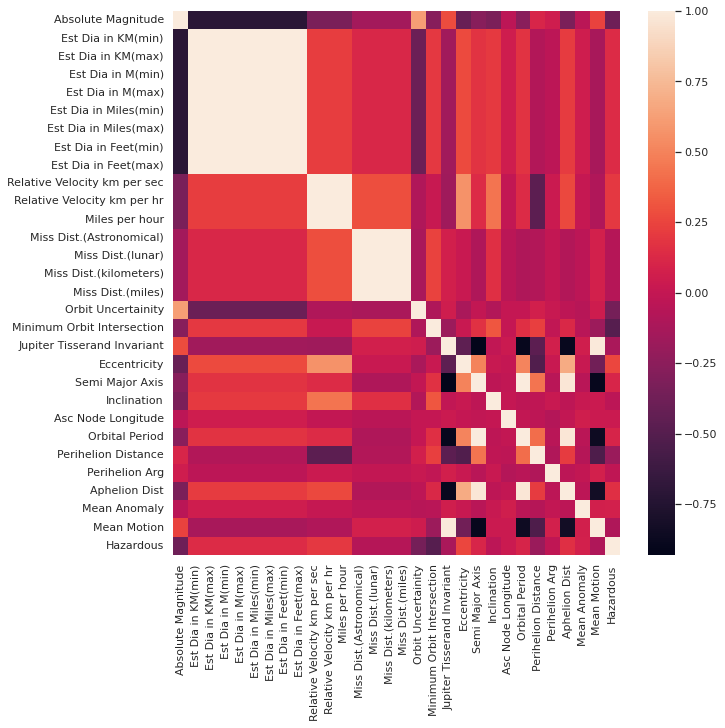

In [151]:
# show data correlation
sns.set(style='darkgrid')
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())

In [152]:
# drop unused feature
df = df.drop(['Est Dia in KM(max)','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)',
'Relative Velocity km per sec','Miles per hour',
'Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(miles)'],axis = 1)
print(df.shape)
df.head()

(1510, 18)


,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,22017.003799,62753692.0,5,0.025282,4.634,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,264.837533,0.590551,True
2,20.3,0.231502,27326.560182,7622911.5,0,0.043058,4.557,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,292.893654,0.559371,True
4,21.6,0.127220,35426.991794,61010824.0,1,0.034798,5.154,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,135.142133,0.726395,True
9,21.5,0.133216,46438.594999,22709816.0,0,0.016907,6.623,0.551389,0.876125,2.059577,2.613682,299.535161,0.393040,253.765937,1.359211,119.861382,1.201862,True
22,21.7,0.121494,102308.235340,7261686.5,1,0.012875,6.152,0.868419,0.906734,4.035074,342.784208,315.368341,0.119309,322.390496,1.694158,303.979299,1.141522,True


<AxesSubplot:>

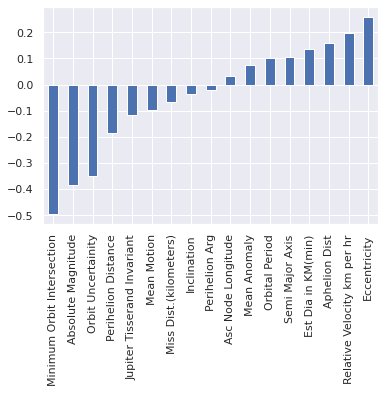

In [153]:
# show feature correlation to hazardous class
df.corr()['Hazardous'][:-1].sort_values().plot(kind='bar')

True     755
False    755
Name: Hazardous, dtype: int64




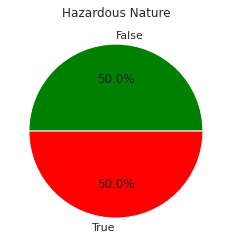

In [154]:
# get the values
print(df['Hazardous'].value_counts())
print('\n')

# show class value chart
lab = 'False','True'
plt.pie(df['Hazardous'].value_counts(), labels = lab, colors = ['green','red'],
        autopct='%1.1f%%')
plt.title('Hazardous Nature')
plt.show()

In [155]:
# get the values
print(df['Orbit Uncertainity'].value_counts())
print('\n')

# show Orbit uncertainty value chart
df1 = df.groupby(["Orbit Uncertainity"]).count().reset_index()

fig = px.bar(df1,
    y=df.groupby(["Orbit Uncertainity"]).size()/len(df)*100,
    x="Orbit Uncertainity")
fig.update_layout(yaxis_title='percentage',
    title_text='Orbit Uncertainity')
fig.show()

0    644
1    260
6    141
2    118
7     97
5     86
4     67
3     66
8     25
9      6
Name: Orbit Uncertainity, dtype: int64




<AxesSubplot:title={'center':'Orbit Uncertainity vs. Hazardous Nature'}, xlabel='Orbit Uncertainity'>

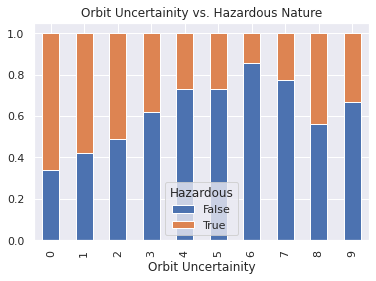

In [156]:
# show Uncertainty vs Hazardous chart
df.groupby('Orbit Uncertainity')['Hazardous'].value_counts(normalize=True).unstack('Hazardous').plot.bar(stacked=True, title='Orbit Uncertainity vs. Hazardous Nature')

Text(0.5, 1.0, 'Absolute Magnitude')

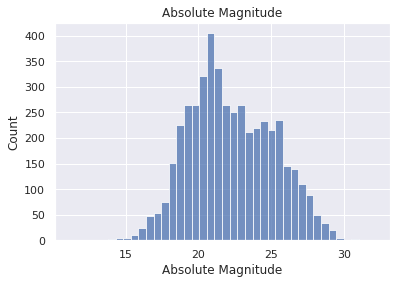

In [157]:
# show Absolute Magnitude chart
sns.histplot(data['Absolute Magnitude']).set_title('Absolute Magnitude')

Text(0.5, 1.0, 'Absolute Magnitude vs. Hazardous Nature')

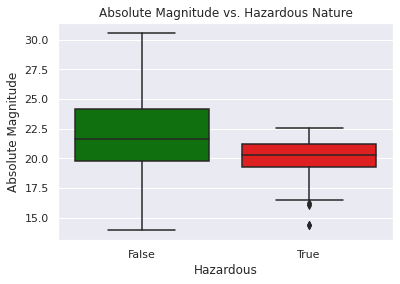

In [158]:
# show Absolute Magnitude vs Hazardous chart
sns.boxplot(x="Hazardous", y="Absolute Magnitude",data=df,palette=('green','red')).set_title('Absolute Magnitude vs. Hazardous Nature')

Text(0.5, 1.0, 'Minimum Orbit Intersection')

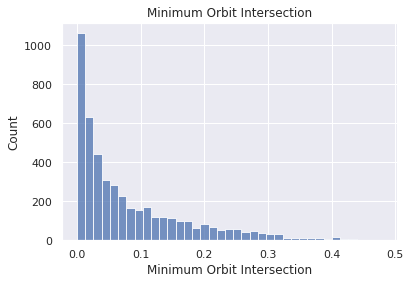

In [159]:
# show  Minimum Orbit Intersection chart
sns.histplot(data['Minimum Orbit Intersection']).set_title('Minimum Orbit Intersection')

Text(0.5, 1.0, 'Minimum Orbit Intersection vs. Hazardous Nature')

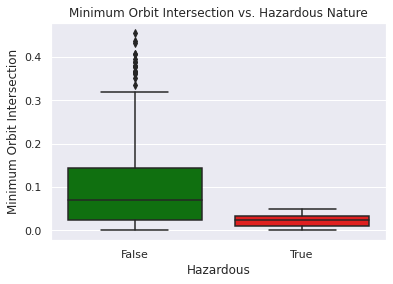

In [160]:
# show Minimum Orbit Intersection vs Hazardous chart
sns.boxplot(x="Hazardous", y="Minimum Orbit Intersection",data=df,palette=('green','red')).set_title('Minimum Orbit Intersection vs. Hazardous Nature')

Text(0.5, 1.0, 'Perihelion Distance')

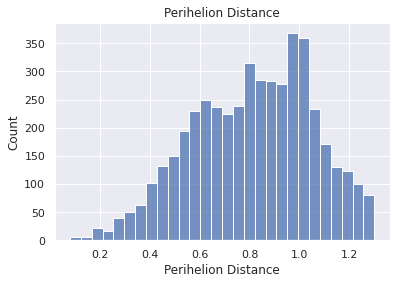

In [161]:
# show  Perihelion Distance chart
sns.histplot(data['Perihelion Distance']).set_title('Perihelion Distance')

Text(0.5, 1.0, 'Perihelion Distance vs. Hazardous Nature')

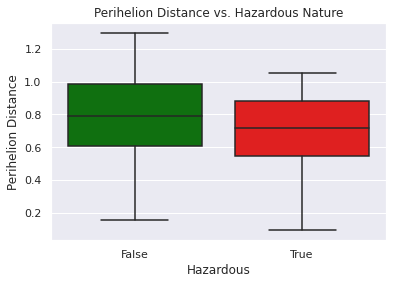

In [162]:
# show Perihelion Distance vs Hazardous chart
sns.boxplot(x="Hazardous", y="Perihelion Distance",data=df,palette=('green','red')).set_title('Perihelion Distance vs. Hazardous Nature')

Text(0.5, 1.0, 'Estimated diameter(min)')

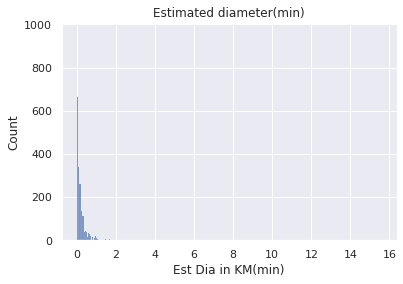

In [163]:
# show Est Dia in KM(min) chart
sns.histplot(data['Est Dia in KM(min)']).set_title('Estimated diameter(min)')

Text(0.5, 1.0, 'Estimated diameter(min) vs. Hazardous Nature')

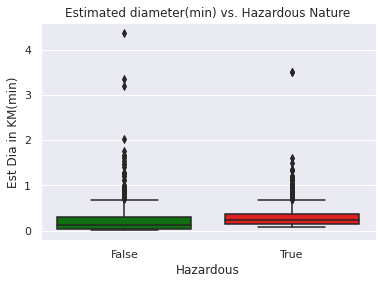

In [164]:
# show Estimated diameter(min) vs. Hazardous chart
sns.boxplot(x="Hazardous", y="Est Dia in KM(min)",data=df,palette=('green','red')).set_title('Estimated diameter(min) vs. Hazardous Nature')

Text(0.5, 1.0, 'Eccentricity')

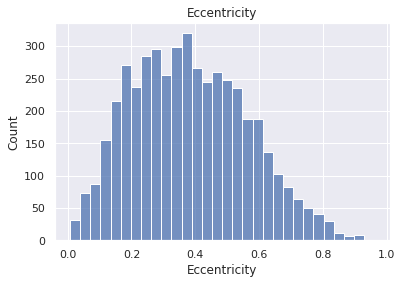

In [165]:
# show Eccentricity chart
sns.histplot(data['Eccentricity']).set_title('Eccentricity')

Text(0.5, 1.0, 'Eccentricity vs. Hazardous Nature')

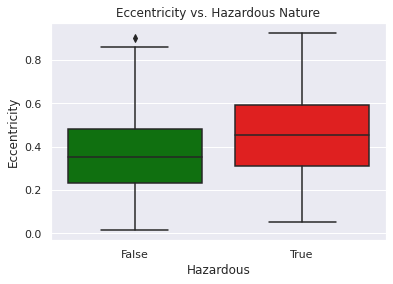

In [166]:
# show Eccentricity vs. Hazardous chart
sns.boxplot(x="Hazardous", y="Eccentricity",data=df,palette=('green','red')).set_title('Eccentricity vs. Hazardous Nature')

Text(0.5, 1.0, 'Relative Velocity')

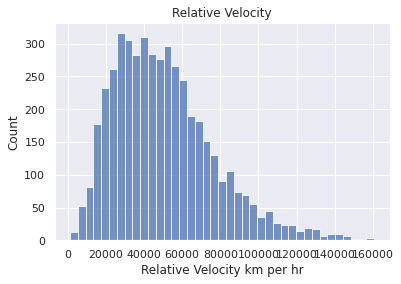

In [167]:
# show Relative Velocity chart
sns.histplot(data['Relative Velocity km per hr']).set_title('Relative Velocity')

Text(0.5, 1.0, 'Relative Velocity vs. Hazardous Nature')

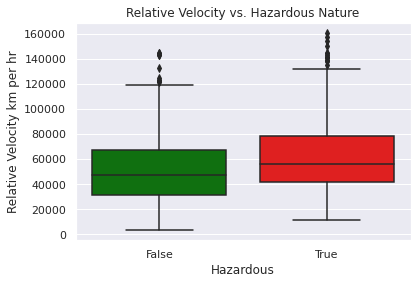

In [168]:
# show Relative Velocity vs. Hazardous Nature chart
sns.boxplot(x="Hazardous", y="Relative Velocity km per hr",data=df,palette=('green','red')).set_title('Relative Velocity vs. Hazardous Nature')

In [169]:
# prepare feature and class
y=df["Hazardous"]
x=df.drop(["Hazardous"],axis=1)

In [170]:
# split dataset for train and test 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=2)
print(train_x.shape)
print(test_x.shape)

(1057, 17)
(453, 17)


In [171]:
# define a function to train and test the models
def train_test_model(model, train_x, test_x, train_y, test_y,labels):
    ''' 
    Train and test the model using the training and test data sets. 
    Return the predictions, accuracy and metric reports. 
    '''
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy = model.score(test_x, test_y)
    metrics_report = classification_report(test_y, predictions)
    precision, recall, fscore, train_support = score(test_y, predictions, average='weighted')
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [172]:
labels = df.Hazardous.unique()
print(labels)

[ True False]


accuracy: 0.9867549668874173
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       230
        True       0.98      1.00      0.99       223

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



/home/uloydev/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



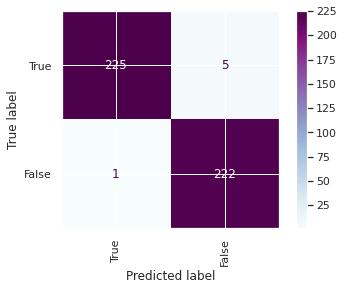

In [173]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)

# fit & predict model
predictions, accuracy, metrics_report, rf_prf = train_test_model(rf_model, train_x, test_x, train_y, test_y, labels)
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(rf_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


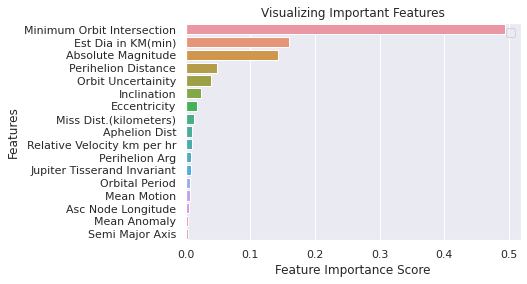

In [174]:
# Visualizing Important Features
feature_imp = pd.Series(rf_model.feature_importances_,index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

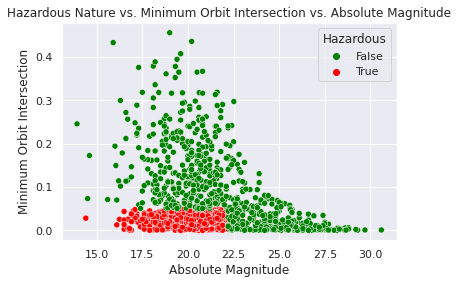

In [175]:
# show Hazardous Nature vs. Minimum Orbit Intersection vs. Absolute Magnitude chart
sns.scatterplot(x=df['Absolute Magnitude'],y=df['Minimum Orbit Intersection'],hue=df['Hazardous'],palette=['green','red']).set_title('Hazardous Nature vs. Minimum Orbit Intersection vs. Absolute Magnitude')
plt.show()

In [176]:
# drop most important feature
df_new = df.drop(['Minimum Orbit Intersection'],axis = 1)
df_new.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,22017.003799,62753692.0,5,4.634,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,264.837533,0.590551,True
2,20.3,0.231502,27326.560182,7622911.5,0,4.557,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,292.893654,0.559371,True
4,21.6,0.127220,35426.991794,61010824.0,1,5.154,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,135.142133,0.726395,True
9,21.5,0.133216,46438.594999,22709816.0,0,6.623,0.551389,0.876125,2.059577,2.613682,299.535161,0.393040,253.765937,1.359211,119.861382,1.201862,True
22,21.7,0.121494,102308.235340,7261686.5,1,6.152,0.868419,0.906734,4.035074,342.784208,315.368341,0.119309,322.390496,1.694158,303.979299,1.141522,True


In [177]:
# create new dataset for train and test

y=df_new["Hazardous"]
x=df_new.drop(["Hazardous"],axis=1)

# split data set into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=2)
print(train_x.shape)
print(test_x.shape)

(1057, 16)
(453, 16)


accuracy: 0.8520971302428256
              precision    recall  f1-score   support

       False       0.91      0.79      0.84       230
        True       0.81      0.92      0.86       223

    accuracy                           0.85       453
   macro avg       0.86      0.85      0.85       453
weighted avg       0.86      0.85      0.85       453



/home/uloydev/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



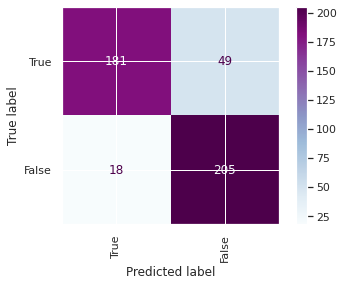

In [178]:
# retry process with new dataset
labels = df_new.Hazardous.unique()

# define the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0, random_state=2)

# fit and predict
predictions, accuracy, metrics_report, rf_prf = train_test_model(rf_model, train_x, test_x, train_y, test_y, labels)
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(rf_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

accuracy: 0.6070640176600441
              precision    recall  f1-score   support

       False       0.60      0.69      0.64       230
        True       0.62      0.52      0.57       223

    accuracy                           0.61       453
   macro avg       0.61      0.61      0.60       453
weighted avg       0.61      0.61      0.60       453



/home/uloydev/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



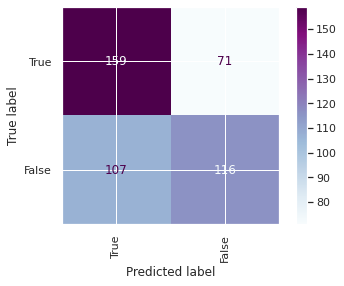

In [179]:
# define the model
nb_model = GaussianNB()

# fit and predict
predictions, accuracy, metrics_report, nb_prf = train_test_model(nb_model, train_x, test_x, train_y, test_y, labels)
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(nb_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

accuracy: 0.5695364238410596
              precision    recall  f1-score   support

       False       0.55      0.91      0.68       230
        True       0.70      0.22      0.33       223

    accuracy                           0.57       453
   macro avg       0.62      0.56      0.51       453
weighted avg       0.62      0.57      0.51       453



/home/uloydev/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/uloydev/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



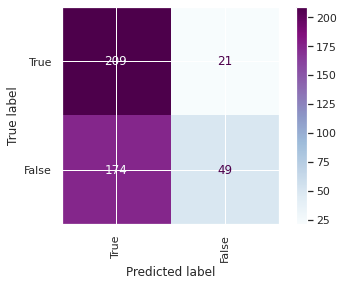

In [220]:
# define the model
svm = LinearSVC(verbose=False, max_iter=1000, C=0.1, random_state=3)

# fit and predict
predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, train_x, test_x, train_y, test_y, labels)
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(svm, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

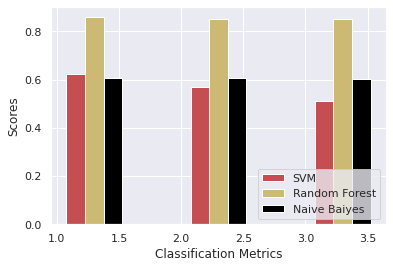

In [207]:
xx = np.array([1,2,3])
width = 0.15
ax = plt.subplot(111)
ax.bar(xx + width, height=np.array(svm_prf), width=width, color='r', align='center', label='SVM')
ax.bar(xx + 2*width, height=np.array(rf_prf), width=width, color='y', align='center', label='Random Forest')
ax.bar(xx + 3*width, height=np.array(nb_prf), width=width, color='black', align='center', label='Naive Baiyes')


plt.xlabel('Classification Metrics')
plt.ylabel('Scores')
plt.legend(loc='lower right')
plt.show()

In [208]:
print("Random Forest")
print("Precission :", rf_prf[0])
print("Recall     :", rf_prf[1])
print("F1 Score   :", rf_prf[2])

print("\nSVM")
print("Precission :", svm_prf[0])
print("Recall     :", svm_prf[1])
print("F1 Score   :", svm_prf[2])

print("\nNaive Baiyes")
print("Precission :", nb_prf[0])
print("Recall     :", nb_prf[1])
print("F1 Score   :", nb_prf[2])

Random Forest
Precission : 0.859108818675778
Recall     : 0.8520971302428256
F1 Score   : 0.8515593883580889

SVM
Precission : 0.621653727110819
Recall     : 0.5695364238410596
F1 Score   : 0.5108659321375767

Naive Baiyes
Precission : 0.6088581761802602
Recall     : 0.6070640176600441
F1 Score   : 0.604072943207535
